In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Smoothing / Blurring
Aim is to supress noise in image. It is done by convoluting a selected kernel(filter) with the image.

### Averaging
Here, kernel is a normalized box. It takes average of all pixels under kernel area and assigns this mean value to the central pixel.

Functions: <b>cv2.blur(image, kernel_size)</b>, <b>cv2.boxFilter(image, depth, kernel_size)</b>

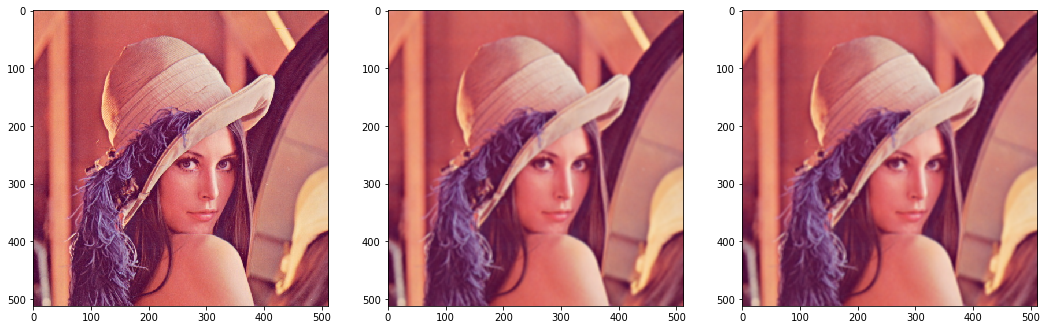

In [2]:
image = cv2.imread('../resources/lena.jpg')

blurred1 = cv2.blur(image, (5, 5))
blurred2 = cv2.boxFilter(image, -1, (5, 5))  # -1 means same depth as source image

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred1, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(blurred2, cv2.COLOR_BGR2RGB))

plt.show()

### Gaussian Filtering
It uses a gaussian kernel, and is highly efficient for gaussian noise (as the name suggests). It is most commonly used in edge detection.

<img src="../resources/gauss.png">

Function: <b>cv2.GaussianBlur(image, kernel_size, sigmaX[, sigmaY])</b>

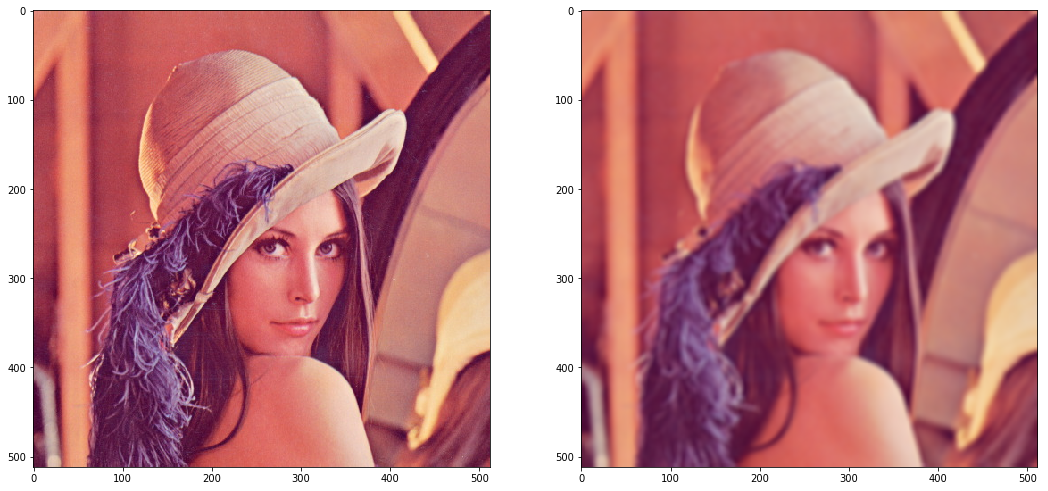

In [3]:
gauss_blur = cv2.GaussianBlur(image, (9, 9), 3)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))

plt.show()

### Median Filtering
As the name suggests, it computes median of all the pixels under the kernel area and assigns this value to the central pixel. It is highly effective in remove salt and pepper noise. [* Each altered pixel value is some pixel from image itself, thus reducing noise very effectively]

Function: <b>cv2.medianBlur(image, kernel_size)</b>

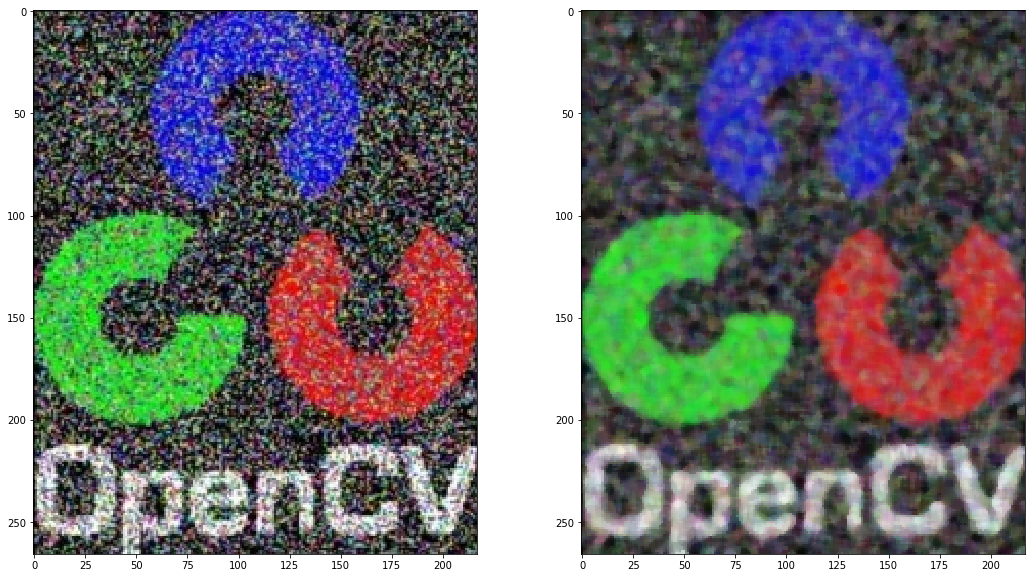

In [4]:
extra_noise = cv2.imread('../resources/noise.jpg')

median_blur = cv2.medianBlur(extra_noise, 5)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(extra_noise, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))

plt.show()

### Bilateral Filtering
Slow but effective in noise suppression without blurring edges. As the name suggests, it uses two filters (both gaussian), one in the space domain, and other as a pixel-intensity-difference function. Thus, in addition to normal gaussian filtering, it ensures that only those pixels with similar intensity to central pixel are included in the computation, and hence preserving edges from getting blurred.

Function: <b>cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)</b> (keep sigma values between 10 and 150)
- d - diameter of pixel neighbourhood used during filtering
- sigmaColor - Filter sigma in color space
- sigmaSpace - Filter sigma in coordinate space

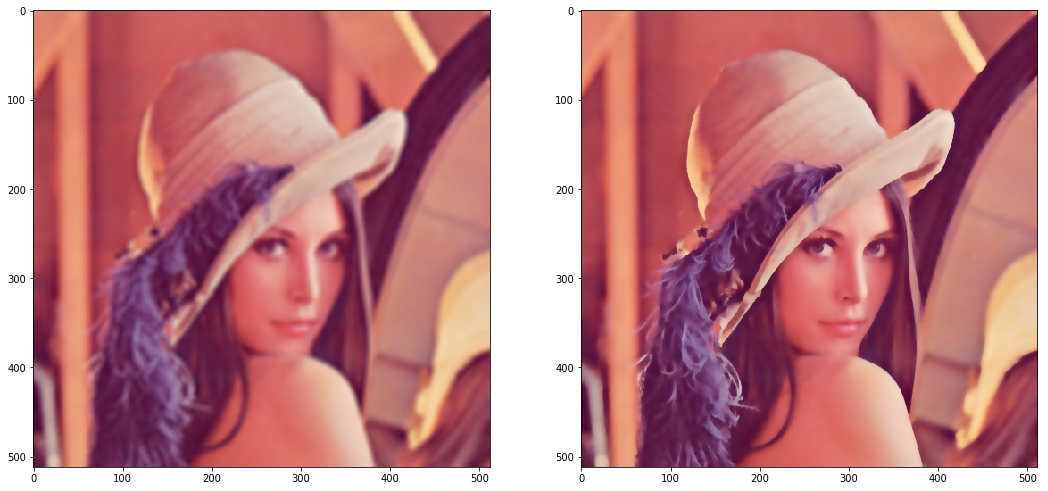

In [5]:
bi_blur = cv2.bilateralFilter(image, 9, 120, 100)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(bi_blur, cv2.COLOR_BGR2RGB))

plt.show()

## Morphological Transformations
Binary images produced after thresholding, are distored by noise and texture. Morphology transformations are some simple operations based on image shape. Morphological operations rely on relative ordering of pixel values rather than their numerical values, and therefore are suitable for processing of binary images.

In morphological transformation, we traverse an image with a structuring element (a small binary image, ie, a small matrix of pixels, each with value 0 or 1), and test various relations between the element and regions of image.

We'll be discussing following types of Morphological Operators:
1. Erosion
2. Dilation
3. Opening
4. Closing
5. Morphological Gradient

In [6]:
# let's have a look at structuring elements first
# 3 major structure elements - rectangle, ellipse, cross

# Rectangular Kernel
print "rectangle"
print cv2.getStructuringElement(cv2.MORPH_RECT, (8, 10))
print
# Elliptical Kernel
print "ellipse"
print cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 10))
print
# Crossed Kernel
print "cross"
print cv2.getStructuringElement(cv2.MORPH_CROSS, (8, 10))
print

rectangle
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]

ellipse
[[0 0 0 0 1 0 0 0]
 [0 0 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 0]]

cross
[[0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0]]



### Erosion
Erodes away the boundaries of foreground object. As kernel is slided over image, central pixel is assigned 1 only if all pixels under kernel area are 1, otherwise 0. This dicreases the thickness of foreground object.

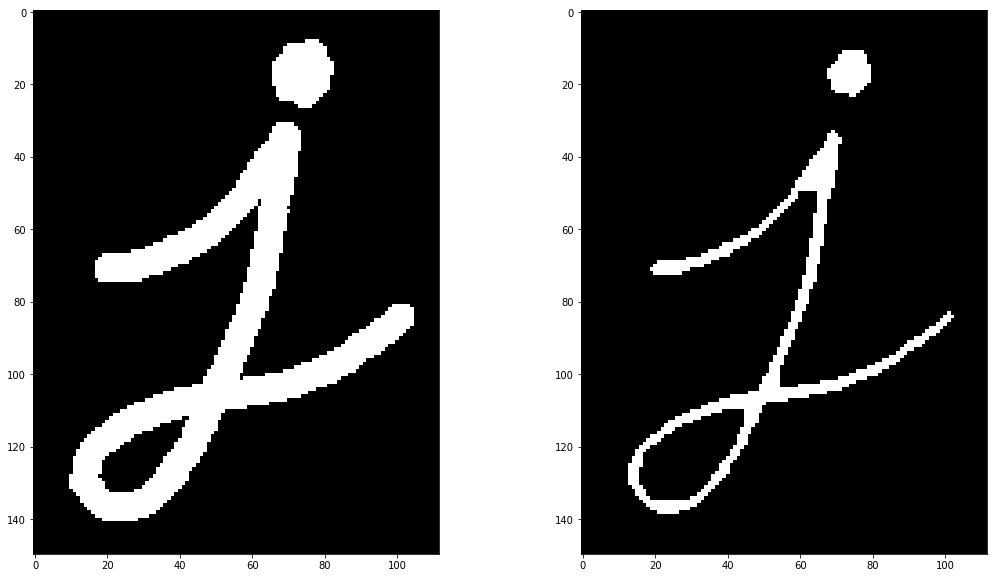

In [7]:
letter = cv2.imread('../resources/letter1.png', cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
eroded = cv2.erode(letter, kernel, iterations=1)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(letter, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')

plt.show()

### Dilation
It's opposite of erosion. Here, even if one pixel under kernel area is 1, the central pixel is assigned 1 as well. Hence, our foreground object is dilated.

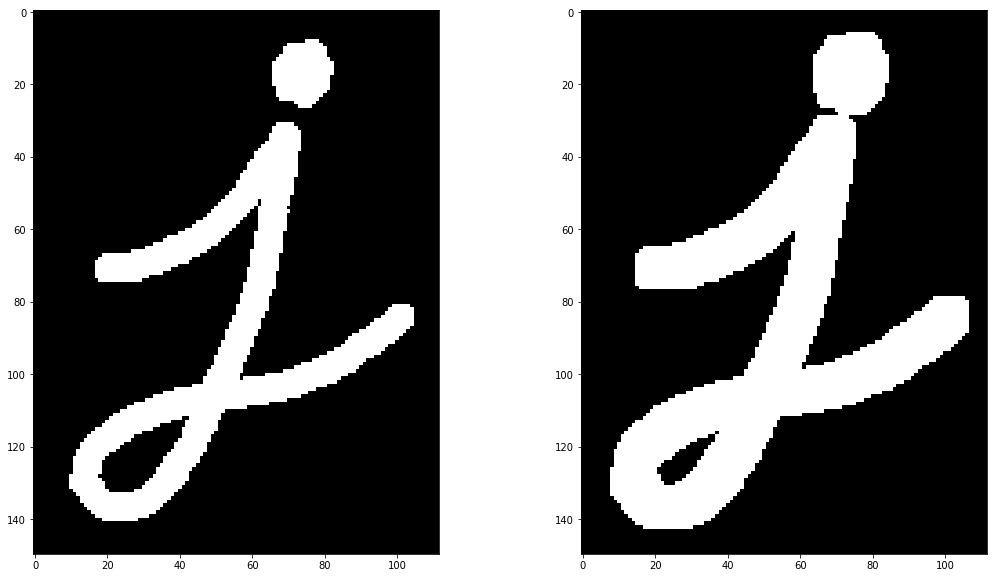

In [8]:
dilated = cv2.dilate(letter, kernel, iterations=1)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(letter, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')

plt.show()

### Opening
Erosion followed by dilation. Erosion removes white noises, and shrinks our foreground object, while dilation dilates our eroded object.

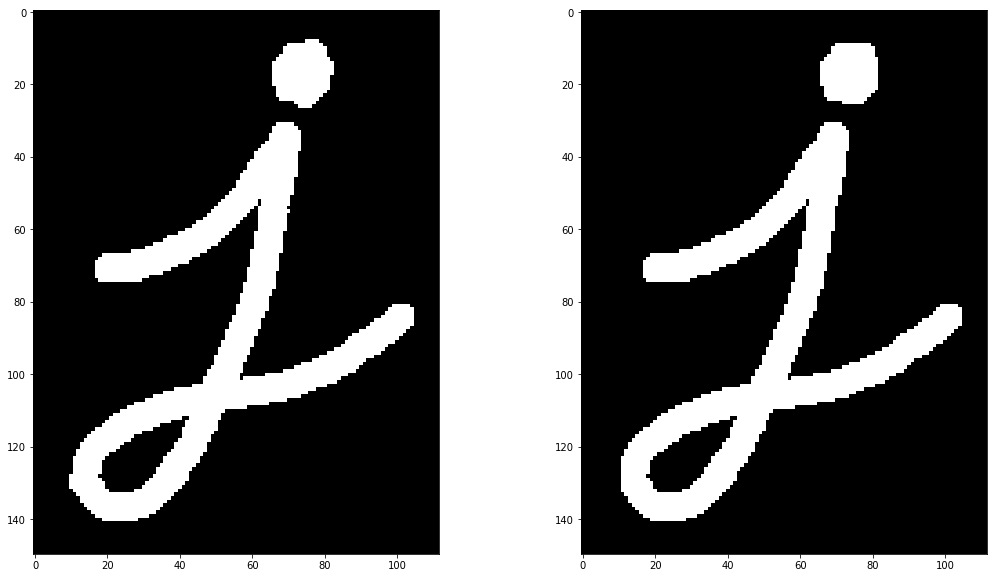

In [9]:
opening = cv2.morphologyEx(letter, cv2.MORPH_OPEN, kernel)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(letter, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(opening, cmap='gray')

plt.show()

### Closing
Dilation followed by Erosion. Used to fill holes in our foreground object.

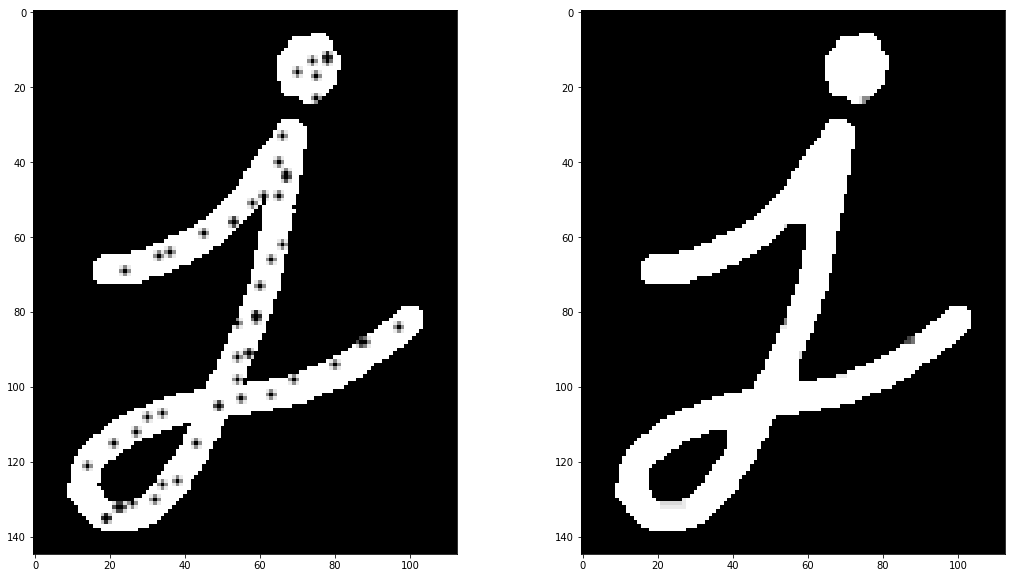

In [10]:
letter = cv2.imread('../resources/letter2.png', cv2.IMREAD_GRAYSCALE)

closing = cv2.morphologyEx(letter, cv2.MORPH_CLOSE, kernel)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(letter, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(closing, cmap='gray')

plt.show()

### Morphological Gradient
Difference between dilation and erosion. Gives us outline of the foreground object

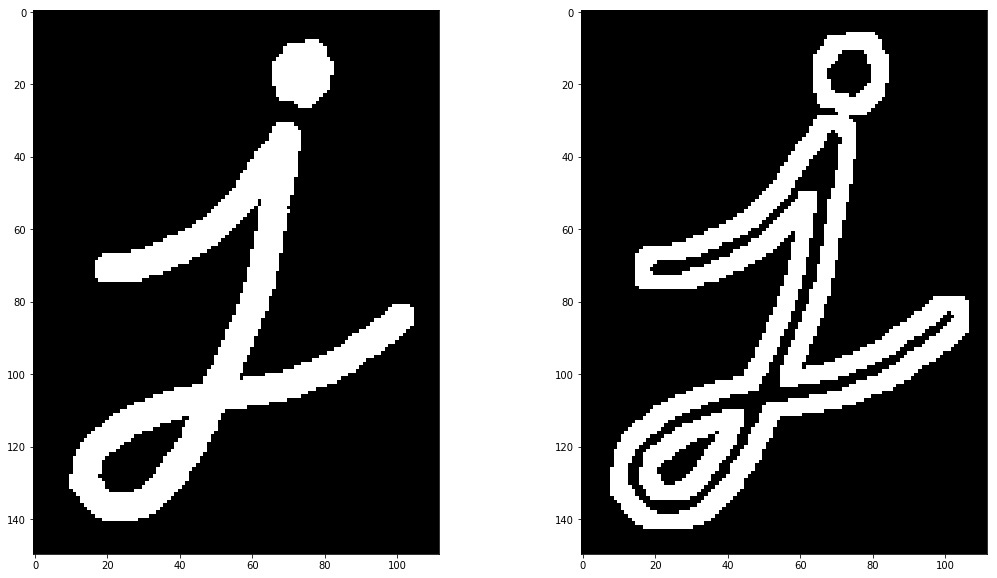

In [11]:
letter = cv2.imread('../resources/letter1.png', cv2.IMREAD_GRAYSCALE)

outline = cv2.morphologyEx(letter, cv2.MORPH_GRADIENT, kernel)

fig = plt.figure()
fig.set_size_inches(18, 10)

fig.add_subplot(1, 2, 1)
plt.imshow(letter, cmap='gray')

fig.add_subplot(1, 2, 2)
plt.imshow(outline, cmap='gray')

plt.show()